# Scientific Programming with Python 
## Assignment 2 - 2023W

**Associate Prof. Dr. Sascha Hunold** \
Research Group for Parallel Computing \
Faculty of Informatics \
TU Wien

In [7]:
# this makes sure that plots will be inserted inline
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1 (8 points ) - RGB Color Intensity of Photos

## Context
- We work with an image of the Vienna Scientific Cluster 5 (VSC-5) provided by S. Hunold taken at the inauguration ceremony.
- The provided Python code reads in an RGB image. The resulting array `im` contains the RGB (red, green, blue) values for each pixel of this image. The image uses 8 bits per color channel, and thus, each color value is in the range of [0,255] (datatype `numpy.uint8`).
- The image contains $m$ rows and $n$ columns. Each pixel is represented by three values (R, G, and B): $p_{k,l,R}$, $p_{k,l,G}$, $p_{k,l,B} \in [0,255]$, where $0 \le k < m$ and $0 \le l < n$.
- You also have three color sliders (widgets) to change the color intensity of each pixel. Each slider value, i.e., $c_R$, $c_G$, $c_B$, represents the current adjustment value for each color channel, where $-255 \le c_R, c_G, c_B \le 255$. When a channel $C_i, i \in \{R,G,B\}$ should be adjusted, we compute the new color value of each pixel as (here shown for the R channel):
$$
\forall 0 \le l < n, 0 \le k <m: p_{k,l,R} = \max\{ 0, \min\{ p_{k,l,R} + c_R, 255 \} \}  \quad . 
$$ (In other words: We add the adjustment value to the channel of each pixel and ensure that the new value is $\ge 0$ and $\le 255$.) The computations for the new values for the Green ($p_{k,l,G}$) and Blue ($p_{k,l,B}$) channels are analogous.

## Tasks
- Use `ipywidgets` to add widgets: insert three `IntSliders`, one for each color (Red, Green, Blue). The values for each slider should be in $[-255,255]$.
- When a slider is adjusted, your code should adjust the intensity of the respective color channel. For example, if you change the Red slider, the Red channel of the image gets recomputed using the fomulas above. The image should be updated whenever a slider value is changed. The updated image should be plotted below the color slides and should have the following size: `figsize = (8,8)`.

## Hints
- To pass the current image to the `interact` function, you can use `im=fixed(im)`.
- You have to be careful with the resulting datatypes. For example, the maximum value representable by `numpy.uint8` is `255`. So, if your current pixel has a red color value of `200` and the adjustment value is `+200`, then the resulting value must be `255`. You cannot store `400` as a pixel value and then compute the minimum value of `255` and `400`, as `400` cannot be stored in this datatype.
- There is a `numpy` function `numpy.putmask` might be helpful, but there are also other ways to solve this task using `numpy`.
- Although the input values are stored as `numpy.uint8`, you may use datatypes of your choice for solving the problem.
- As always, you may use any library that you can install with `pip` on our JupyterHub server.

- The widgets and the image should look like this:
<div>
<img src="./shared/191.125-2023W/assignment2/image_channels.jpg" width="600"/>
</div>


In [8]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np

from ipywidgets import interact, fixed
import ipywidgets as widgets

# Load the image
im = imageio.imread('./shared/191.125-2023W/assignment2/IMG_8202.jpg', pilmode="RGB")

# Function to adjust color intensity based on slider values
def adjust_color_intensity(c_R, c_G, c_B, im):
    # Copy the original image to avoid modifying the original
    modified_im = im.copy().astype(np.int32)
    
    # Adjust the intensity for each color channel
    modified_im[:, :, 0] = np.clip(modified_im[:, :, 0] + c_R, 0, 255)
    modified_im[:, :, 1] = np.clip(modified_im[:, :, 1] + c_G, 0, 255)
    modified_im[:, :, 2] = np.clip(modified_im[:, :, 2] + c_B, 0, 255)
    
    # Plot the modified image
    plt.figure(figsize=(8, 8))
    plt.imshow(modified_im.astype(np.uint8))
    plt.show()

# Sliders for each color channel
red_slider = widgets.IntSlider(value=0, min=-255, max=255, description='Red')
green_slider = widgets.IntSlider(value=0, min=-255, max=255, description='Green')
blue_slider = widgets.IntSlider(value=0, min=-255, max=255, description='Blue')

# Interact to update the image based on slider values
interact(
    adjust_color_intensity,
    c_R=red_slider,
    c_G=green_slider,
    c_B=blue_slider,
    im=fixed(im)
)

# # Display the original image
# plt.figure(figsize=(8, 8))
# plt.imshow(im)
# plt.show()


interactive(children=(IntSlider(value=0, description='Red', max=255, min=-255), IntSlider(value=0, description…

<function __main__.adjust_color_intensity(c_R, c_G, c_B, im)>

# Task 2 (6 points) - Using `sympy` to determine the area under the curve

## Context
We now use `sympy` to compute the total closed area between a function and the x axis (above the x axis). If there is no such closed area, then we define the area to be `-1`. 
To put it differently, each piece of the overall area must be bounded by two roots of the function. Please notice that we are only interested in the closes areas above the x axis.

We also provide an example of which area to compute (marked in blue) in the next figure:
<div>
<img src="./shared/191.125-2023W/assignment2/area_example.png" width="800"/>
</div>
Note that this is an example that was not plotted with Python (this is just for illustration purposes).

## Tasks
1. Implement the function `plot_function(f)`. Plot the function using `sympy` and use the following boundaries for the x axis:
   - left  bound: 
       - if $x_l$ denotes the smallest root of function $f$ then the left bound is $\lceil x_l - 2\rceil$
       - if there is no root, use `-5`
   - right bound: 
       - if $x_l$ denotes the largest root of function $f$ then the left bound is $\lceil x_l + 2\rceil$
       - if there is no root, use `5`
       
   For the y axis, use the range `[-8, 8]`.
2. Implement the function `compute_area(f)`. Compute the total closed area between the function and the x-axis . 
The function `compute_area(f)` should in principal work for an arbitrary polynomial function (one that depends on $x$). 
We will primarily base our checks on the 6 provided functions below. Yet, we may also test a few other polynomials.
Note that your code only needs to work for functions for which `sympy` can find real number roots.

## Hints
- You may first find the roots of a function and then compute the area.
- For each function, create a separate plot.
- We are interested in the sum of closed areas.
- The example (plot) above was created with another plotting program, which I simply used to easily color the closed area in plot. You DO NOT have to color (fill) the closed areas in your plots (you may do this of course, but it won't give you any points). Thus, a simple lineplot for the function will do.


In [11]:
import matplotlib.pyplot as plt
import sympy

from sympy.plotting import plot

#
def compute_area(f):
    """
    :param f: sympy function
    :returns: area under the curve as 'float'
    """
    sol0 =  sympy.solve(f, x)
    sol = [n for n in sol0 if n.is_real]

    areas_all = [sympy.integrate(f, (x, i, i+1)) for i in sol]
    _ = areas_all.pop()
    
    area = sum([i for i in areas_all if i > 0])
    if area:
        if isinstance(area, int):
            area = area
        else:
            area = area.evalf()

    else:
        area = -1.0
                        
    return area



def plot_function(f):   

    sol0 =  sympy.solve(f, x)
    sol = [n for n in sol0 if n.is_real]

    if sol:
        lb = sol[0] - 2
        rb = sol[-1] + 2
    else:
        lb = -5
        rb = 5

    
    return plot(f, xlim=[lb, rb], ylim=[-8, 8])


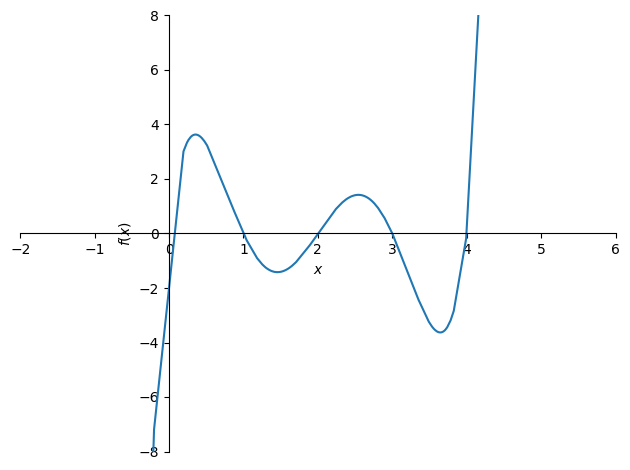

area under the curve: 3.16666666666667


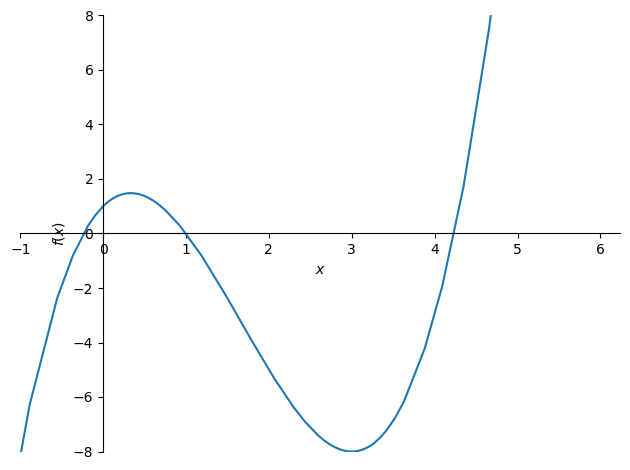

area under the curve: 1.11119737833375


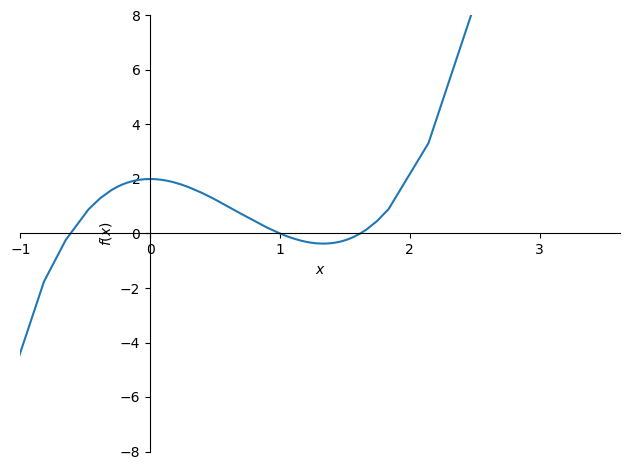

area under the curve: 1.71529934458344


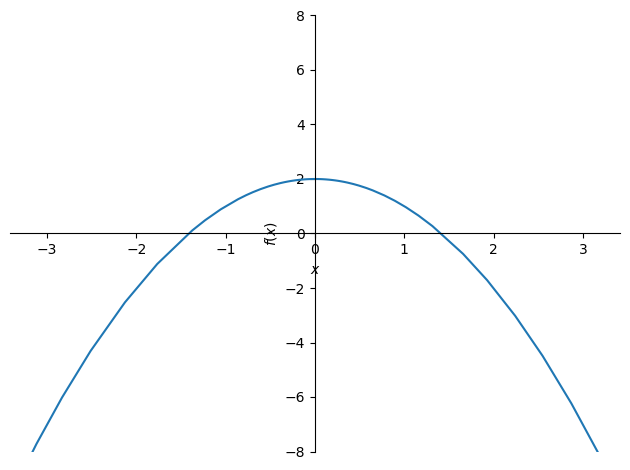

area under the curve: 1.08088022903976


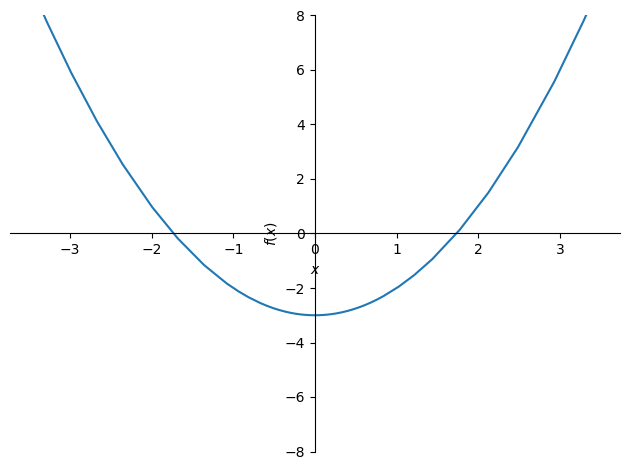

area under the curve: -1.0


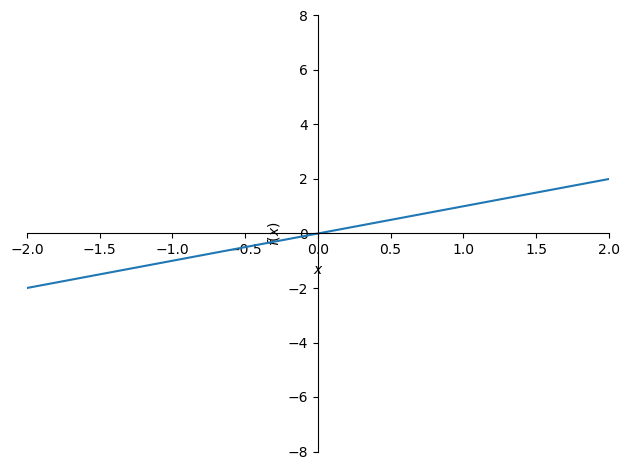

area under the curve: -1.0


In [12]:
x = sympy.symbols("x", real=True)

f1 = x**5 - 10*x**4 + 35*x**3 - 50*x**2 + 24*x
f2 = 1*x**3 - 5*x**2 + 3*x + 1
f3 = 2*x**3 - 4*x**2 + 2
f4 = -x**2 + 2
f5 = x**2 - 3
f6 = x

for f in [f1, f2, f3, f4, f5, f6]:
    plot_function(f)
    print("area under the curve:", compute_area(f))

# Task 3 (6 Points) - OO Programming

Your task is to implement classes `Shape`, `Rectangle`, and `Circle`.
You are given the following specification:
- A Rectangle has the properties `width` (`int`), `height` (`int`), and `color` (`str`).
- A Circle has the properties `radius` (`float`) and `color` (`str`).
- The properties should be passed to the classes in the constructor.
- The color string must specify a valid color of `matplotlib` (see https://matplotlib.org/3.1.1/tutorials/colors/colors.html).

`Circle` and `Rectangle` inherit from class `Shape`, which is an abstract class that should not be used for plotting. Therefore, `Shape` will be a superclass of `Circle` and `Rectangle`. `Shape` should declare the methods `getArea()` and `getPlot(x,y)` to be `@abstractmethod`s. 

`Shape` should provide a method `getColor()`, which is then inherited by all subclasses, i.e., by `Circle` and `Rectangle`:
* `getColor()`: returns the color of the current shape.

`Rectangle` and `Circle` should implement the following methods:
* `__init__(...)`: Objects should be created with their instance variables initialized, e.g., `rectangle1 = Rectangle(10,5,'black')`
* `getArea()`:  returns the area of the current shape.
* `getPlot(x, y)`: returns a `pyplot` of the current shape. The parameters of the method define the `x` and `y` coordinates of the current shape.
* `__str__()`: the string function returns the dimensions of the current shape, e.g., for a `Rectangle`: `"w: 10, h: 5"` and for a `Circle`: `"r: 5"`

## Hints 
- `ShapePrinter` is a provided class that can be used to test if your code works correctly.
- for more information about the `ABC` class, see https://docs.python.org/3/library/abc.html
- the `getPlot(x, y)` should simply return a plot like `return plt.Circle(0, 0, radius=2)`

In [13]:
from abc import ABC, abstractmethod
import math
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [14]:
class Shape(ABC):
    def __init__(self, color):
        self.color = color

    def getColor(self):
        return self.color
        
    @abstractmethod
    def getArea(self):
        pass
        
    @abstractmethod
    def getPlot(x, y):
        pass
    

class Circle(Shape):
    def __init__(self, radius, color):
        self.radius = radius
        super().__init__(color)

    def getArea(self):
        area = math.pi * self.radius ** 2
        return area

    def __str__(self):
        return f"r: {self.radius}"

    def getPlot(self, x, y):
        return plt.Circle((x, y), radius=self.radius, color=self.color)
        # circle = plt.Circle((x, y), self.radius, color=self.color)
        # fig, ax = plt.subplots()
        # ax.add_patch(circle)

class Rectangle(Shape):
    def __init__(self, width, height, color):
        self.width = width
        self.height = height
        super().__init__(color)
    

    def getArea(self):
        area = self.width * self.height
        return area

    def __str__(self):
        return f"w: {self.width}, h: {self.height}"

    def getPlot(self, x, y):
        return plt.Rectangle((x, y), width=self.width, height=self.height, color=self.color)
        # rectangle = plt.Rectangle((x, y), self.width, self.height, color=self.color)
        # fig, ax = plt.subplots()
        # ax.add_patch(rectangle)        

| Shape | Dimensions | Area | Color|
|---|---|---|---|
|Rectangle |w: 40, h: 20 |800|lightblue|
|Rectangle |w: 40, h: 1 |40|green|
|Circle |r: 3 |28.27|yellow|
|Rectangle |w: 3, h: 8 |24|brown|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|


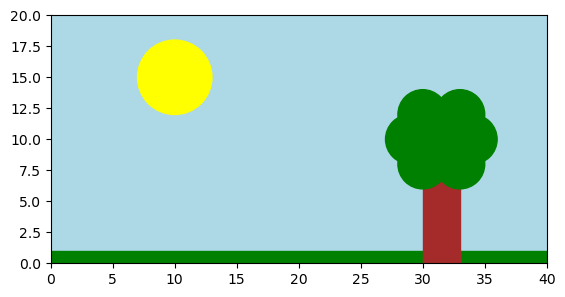

In [15]:
# This code below is to see if your implemented code works
# Do not change the following piece of code.

class ShapePrinter():
    def __init__(self,xlim,ylim):
        self.fig = plt.figure()
        self.markdown = "| Shape | Dimensions | Area | Color|\n|---|---|---|---|\n"

        self.ax = self.fig.add_subplot(1, 1, 1)
        self.ax.set_xlim(xlim)
        self.ax.set_ylim(ylim)
        self.ax.set_aspect('equal', adjustable='box')
    
    def addShape(self,shape,x,y):
        plot = shape.getPlot(x,y)
        self.ax.add_patch(plot)
        self.markdown += '|{} |{} |{}|{}|\n'.format(type(shape).__name__,shape,round(shape.getArea(), 2), shape.getColor())

    def printTable(self):
        display(Markdown(self.markdown))

# Instantiation
leaf = Circle(2,'green')
sun = Circle(3,'yellow')
trunk = Rectangle(3,8,'brown')
sky = Rectangle(40,20,'lightblue')
lawn = Rectangle(40,1,'green')


printer = ShapePrinter([0,40],[0,20])
# Sky
printer.addShape(sky,0,0)
# Lawn
printer.addShape(lawn,0,0)
# Sun
printer.addShape(sun,10,15)
# Tree
printer.addShape(trunk,30,0)
printer.addShape(leaf,30,8)
printer.addShape(leaf,30,12)
printer.addShape(leaf,33,8)
printer.addShape(leaf,33,12)
printer.addShape(leaf,29,10)
printer.addShape(leaf,34,10)
printer.addShape(leaf,32,10)
printer.printTable()

# Task 4 (4 + 2 + 2 points) - Matrix Formats + Unit Testing + Storage Requirements

Sparse matrices play an important role in scientific computing. There are several ways of storing sparse matrices that require less memory than storing the entire matrix, one that includes all zero elements.

One of these storage formats for sparse matrices is the Compressed Sparse Row Format (CSR).
For an example and a description, see https://docs.nvidia.com/cuda/cusparse/index.html#csr-format.

## Task 4.1 Matrix Generation and CSR Conversion

Now, you should complete the following two sub-tasks:
1. implement a sparse matrix generator, and
2. implement a function to convert a sparse matrix into the CSR format.

### 4.1.1 Sparse Matrix Generator

- Create a new class that inherits from `AbstractSparseMatrixGenerator`
- In the inherited class implement the function `generate_matrix(self, n, perc_non_zeros=0.1)`
    - `n` is the dimension of the matrix (we work with square matrices)
    - `perc_non_zeros` defines the percentage of non-zero elements as a value betwen `0.0` and `1.0`
    - the function must return a square `nxn` matrix of type `np.ndarray` (from `numpy`)
    - every non-zero matrix entry should be sampled using `np.random.uniform()`
    - `perc_non_zeros` is a lower bound of the actual ratio of non zeros elements. So, we are looking for the smallest number of non-zero elements $z$ for which $\frac{z}{n^2} \ge $ `perc_non_zeros` holds.
    
### 4.1.2 Convert to CSR Format

The sparse matrix generator that you have implemented creates sparse matrices with $O(n^2)$ storage, regardless of the number of non-zeros, as we store all values in a `nxn` array of type `np.ndarray`.

Implement the function `convert_to_csr(matrix)`, which takes an `nxn` matrix of type `np.ndarray` and converts it into a matrix of type `MyCSRFormat`.

You should implement this function yourself, i.e., you should not use `cuSPARSE`.

In [17]:
import numpy as np
import sys
from abc import ABC, abstractmethod

class MyCSRFormat():
    
    def __init__(self, n, vals, col_idx, row_ptr):
        self.n = n
        self.vals = vals
        self.col_idx = col_idx
        self.row_ptr = row_ptr
                
    def __str__(self):
        s = ""
        s += "MyCSRFormat\n"
        s += "vals: "
        for i in range(len(self.vals)):
            s += str(self.vals[i]) + " "
        s += "\n"
        s += "col_idx: "
        for i in range(len(self.col_idx)):
            s += str(self.col_idx[i]) + " "
        s += "\n"
        s += "row_ptr: "
        for i in range(len(self.row_ptr)):
            s += str(self.row_ptr[i]) + " "
        s += "\n"
        return s
    
    def get_size(self):
        # you may need to adjust this code depending on your generation method
        return sys.getsizeof(self.vals) + sys.getsizeof(self.col_idx) + sys.getsizeof(self.row_ptr)
    
class AbstractSparseMatrixGenerator(ABC):
    def __init__(self):
        pass
    
    @abstractmethod
    def generate_matrix(self, n, perc_non_zeros=0.1):
        pass


In [24]:
def convert_to_csr(matrix):
    # Converting Matrix to CSR
    n = matrix.shape[0]
    
    # Extract non-zero values and their indices
    vals = matrix[matrix != 0]
    col_idx = np.where(matrix != 0)[1]
    
    # Calculate row pointers
    row_ptr = np.zeros(n + 1, dtype=int)
    row_ptr[1:] = np.cumsum(np.sum(matrix != 0, axis=1))
    
    return MyCSRFormat(n, vals, col_idx, row_ptr)


class MySparseMatrixGenerator(AbstractSparseMatrixGenerator):
    # Generating Sparse Matrix
    def generate_matrix(self, n, perc_non_zeros=0.1):
        # Calculate the minimum number of non-zero elements
        min_non_zeros = int(np.ceil(perc_non_zeros * n * n))
        
        # Generate a sparse matrix with random non-zero values
        matrix = np.zeros((n, n))
        non_zero_indices = np.random.choice(n * n, min_non_zeros, replace=False)
        matrix.flat[non_zero_indices] = np.random.uniform(size=min_non_zeros)
        
        return matrix


# Uncomment below for example usage:
# generator = MySparseMatrixGenerator()
# sparse_matrix = generator.generate_matrix(5, perc_non_zeros=0.2)
# print(sparse_matrix)
# csr_matrix = convert_to_csr(sparse_matrix)
# print(csr_matrix)
# print("CSR Matrix Size:", csr_matrix.get_size())

In [ ]:
# this cell contains some of our test code, please ignore


## Task 4.2

You should implement 3 unit tests for checking your implementation of the sparse matrix generator and 3 unit test for the CSR conversion function.

In particular, implement the following test cases:

**TestMySparseMatrixGenerator**
- Test 1
    - create an instance of your sparse matrix generator 
    - generate a matrix
    - set `n=100` in your test
    - set `perc_non_zeros=0.1` in your test 
    - test return type of the generated matrix  
- Test 2
    - same generation procedure as above
    - test that dimensions are correct
- Test 3
    - same generation procedure as above
    - compare the percentage of non-zero elements in the matrix to the input percentage and make sure that it fulfills the definition from Task 4.1.1

**TestConverter**
- Test 1
    - generate matrix `n=100`, `perc_non_zeros=0.01`
    - count number of non-zeros in original matrix
    - convert matrix to CSR format
    - test that value array in CSR format has same number of non zeros as original matrix
- Test 2
    - same generation procedure as above
    - test length of row_ptr is one larger than `n`
- Test 3
    - same generation procedure as above
    - test length of col_idx has same number of non zeros as original matrix
    - and also that length of col_idx is same as length of values

In [27]:
import unittest
import numpy as np

class TestMySparseMatrixGenerator(unittest.TestCase):
    # reducing redundancy 
    def setUp(self):
        self.generator = MySparseMatrixGenerator()

    def test_return_type(self):   
        matrix = self.generator.generate_matrix(100, perc_non_zeros=0.1)
        self.assertIsInstance(matrix, np.ndarray)

    def test_dimensions(self):
        matrix = self.generator.generate_matrix(100, perc_non_zeros=0.1)
        self.assertEqual(matrix.shape, (100, 100))

    def test_sparsity(self):
        matrix = self.generator.generate_matrix(100, perc_non_zeros=0.1)
        non_zeros = np.count_nonzero(matrix)
        actual_percentage = non_zeros / (100 * 100)
        self.assertAlmostEqual(actual_percentage, 0.1, delta=0.01)

class TestConverter(unittest.TestCase):
    
    def test_non_zeros(self):
        matrix = MySparseMatrixGenerator().generate_matrix(100, perc_non_zeros=0.01)
        original_non_zeros = np.count_nonzero(matrix)
        csr_matrix = convert_to_csr(matrix)
        csr_non_zeros = len(csr_matrix.vals)
        self.assertEqual(original_non_zeros, csr_non_zeros)

    def test_len_row_ptr(self):
        matrix = MySparseMatrixGenerator().generate_matrix(100, perc_non_zeros=0.01)
        csr_matrix = convert_to_csr(matrix)
        self.assertEqual(len(csr_matrix.row_ptr), 101)

    def test_len_col_idx(self):
        matrix = MySparseMatrixGenerator().generate_matrix(100, perc_non_zeros=0.01)
        csr_matrix = convert_to_csr(matrix)
        original_non_zeros = np.count_nonzero(matrix)
        self.assertEqual(len(csr_matrix.col_idx), original_non_zeros)
        self.assertEqual(len(csr_matrix.col_idx), len(csr_matrix.vals))

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_len_col_idx (__main__.TestConverter) ... ok
test_len_row_ptr (__main__.TestConverter) ... ok
test_non_zeros (__main__.TestConverter) ... ok
test_dimensions (__main__.TestMySparseMatrixGenerator) ... ok
test_return_type (__main__.TestMySparseMatrixGenerator) ... ok
test_sparsity (__main__.TestMySparseMatrixGenerator) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.008s

OK


## Task 4.3

Last, we are looking for a plot to compare the storage requirements of sparse matrices of type `np.ndarray` and to matrices of type `MyCSRFormat`.

- Generate sparse matrices using your generator of size $n^2$, where $n=100$.
    - Generate matrices for the following values of `perc_non_zeros`: `[ 0.01, 0.1, 0.2, 0.5 ]`
    - Compute the memory occupied by each of these matrices
- Convert the 4 matrices to the CSR format of type `MyCSRFormat`    
    - Retrieve the memory footprint of these matrices
- Provide the following plot
    - x axis: sparsity (the values from `perc_non_zeros`)
    - y axis: storage in KiB (kibibyte)
    - use lines and points in your plots (`marker="o"`)
    
### Comments

You may use the `sys.getsizeof(..)` function to retrieve the size of data structures. But this function may not always give you what you expect.
You can also estimate the storage requirements of matrices yourself using a formula. In this case, clearly state which data type you assume for each matrix/array element, which may be different for the individual arrays (e.g., the `col_idx` and the `vals` arrays are typically not of the same type).

We are not primarily looking for the exact number of Bytes that all matrices and arrays require in the Python interpreter.
Thus, you may simply sum up the space requirements of all matrix and array elements with respect to their data type. 
In general, we are more interested in a storage model, i.e., when are specialized data structures for storing sparse matrices beneficial in terms of space.

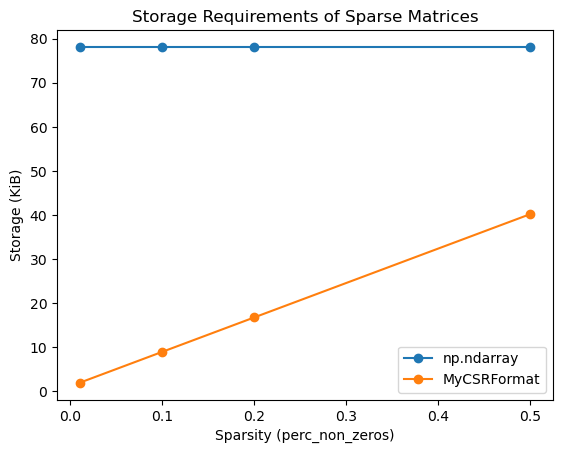

In [28]:
import sys
import numpy as np
import sys
import matplotlib.pyplot as plt

# Assume data type for elements in np.ndarray matrices
element_dtype = np.float64

# Generate sparse matrices using the generator
n = 100
sparsity_values = [0.01, 0.1, 0.2, 0.5]
np_storage = []
csr_storage = []

for perc_non_zeros in sparsity_values:
    # Generate np.ndarray matrix
    np_matrix = MySparseMatrixGenerator().generate_matrix(n, perc_non_zeros)
    
    # Compute memory occupied by np.ndarray matrix
    np_matrix_memory = np_matrix.nbytes
    
    # Convert to CSR format
    csr_matrix = convert_to_csr(np_matrix)
    
    # Compute memory occupied by CSR matrix
    csr_matrix_memory = csr_matrix.get_size()
    
    # Append results to storage lists
    np_storage.append(np_matrix_memory / 1024)  # Convert to KiB
    csr_storage.append(csr_matrix_memory / 1024)  # Convert to KiB

# Plot the results
plt.plot(sparsity_values, np_storage, marker="o", label="np.ndarray")
plt.plot(sparsity_values, csr_storage, marker="o", label="MyCSRFormat")
plt.xlabel("Sparsity (perc_non_zeros)")
plt.ylabel("Storage (KiB)")
plt.legend()
plt.title("Storage Requirements of Sparse Matrices")
plt.show()

# Task 5 (3 + 3 Points) - Python arXiv API

In this task, we use a Python API for accessing arXiv.

Your task is to implement the functions
- `get_article_ids(name, max_results=5)` and
- `create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf")`.    

## Specifications

`get_article_ids(name, max_results=5)`
- The function shold return a list of IDs (as `str`) that match the name given. The list should have atmost `max_results` entries. The list of results should be sorted by `arxiv.SortCriterion.SubmittedDate`.
- This function takes two inputs, `name` as `str` and `max_results` as `int` (`max_results` will never be larger than 20).
- The parameter `name` define the name of a person, e.g., "Jack Dongarra" or "Jack J. Dongarra" or "S. Hunold" or "Turing" or "Turing Alan" etc.
- We simply treat each substring of `name` as a separate name in the search query for arxiv. For example, the name `"Jack Dongarra"` gets translated to search query `"au:Jack AND au:Dongarra"`, and `"S. Hunold"` gets translated to `"au:S. AND au:Hunold"`.
- The ID of an article is the last part of an arXiv URL, e.g., the ID of `https://arxiv.org/abs/2302.11474` is `2302.11474`.


`create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf")`
- This function creates a PDF file called `pdf_name` in directory `pdf_dir`.
- This resulting PDF file contains all the first pages from the articles in `lst_ids`, and only the first pages.
- Thus, you will have to download each PDF file that correspond to the IDs in `lst_ids` (these IDs are always valid). Then you will need to extract the 1st page of each of these input files and write ONE resulting PDF file with all 1st pages (in the same order as given in lst_ids).
    - These temporary PDF files (the ones for `lst_ids`) should also be downloaded to `pdf_dir`.
    - IMPORTANT: A PDF file for a specific ID in `lst_ids` should only be downloaded if it does not exist in `pdf_dir` (i.e., cache your PDF files in `pdf_dir`).
    - The output file `pdf_name` should always be created, also if it already exists in `pdf_dir`.

## Comments 
- We have solved both tasks using the `arxiv` and `PyPDF2` library. However, you may use libraries of your choice for solving this task.
- A sample output file can be found in `shared/191.125-2023W/assignment2/bar.pdf`.

In [31]:
# use these libraries or any other library that may help you
!pip install arxiv
!pip install PyPDF2

In [32]:
import arxiv
import PyPDF2

In [35]:
import os
from os.path import exists

def get_article_ids(name, max_results=5):

    
    name_final = ' AND '.join(['au:' + i for i in name.split()])
    search = arxiv.Search(
    query = name_final,
    max_results = max_results,
    sort_by = arxiv.SortCriterion.SubmittedDate
    )
    entry_id = []
    for result in arxiv.Client().results(search):
        id = result.entry_id
        id = id.split('/')[-1]
        entry_id.append(id)
    return entry_id
    
def create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf"):
    if not exists(f"{pdf_dir}"):
        os.mkdir(f"{pdf_dir}")
    writer = PyPDF2.PdfWriter()
    for id in lst_ids:
        if not exists(f"{pdf_dir}/{id}.pdf"):
            paper = next(arxiv.Client().results(arxiv.Search(id_list=[id])))
            paper.download_pdf(dirpath = pdf_dir, filename= f"{id}.pdf")
            
        reader = PyPDF2.PdfReader(f"{pdf_dir}/{id}.pdf")
        page = reader.pages[0]
        writer.add_page(page)
    with open(f"{pdf_dir}/{pdf_name}", "wb") as fp:
        writer.write(fp)

In [36]:
ids = get_article_ids("Jack Dongarra", 3)
# should print ['2302.11474v2', '2207.09281v1', '2203.02544v1']
print(ids) 
# should produce a PDF file with the 1st page of the following articles (in this order)
# 1. Randomized Numerical Linear Algebra
# 2. Proposed Consistent Exception Handling for the BLAS and LAPACK
# 3. Reinventing High Performance Computing: Challenges and Opportunities
create_first_pages_pdf(ids, "bar.pdf", "./pdf_out")

['2312.09376v1', '2302.11474v2', '2207.09281v1']
